[Python and R code templates be found here](https://github.com/GEOS300/Assignment03) to help get you started.


## Instructions

It is strongly recommended that you complete the assignment in Python or R, although you can complete it in excel/numbers if necessary.  They will download the data for you and get you started with a few blocks of code to make plots and tables.  If you are electing to complete the lab in excel, you can find all the relevant data files here [here](https://github.com/GEOS300/AssignmentData/).  **Note** these data are in .csv format.  If you plan to work in excel, you should save a copy of the data in a suitable excel format (e.g., .xlsx) before making any charts or doing any calculations.

Please upload your answers including all calculations, discussions, tables, and graphs in a single document (PDF or HTML file). Note that you can download your .ipynb file under 'File $\gg$ Download as $\gg$ HTLM or PDF via Latex' and submit this as your report. Label the report document with your name and your student number. Upload your answers to Canvas. **Do not attach a spreadsheet.**

**Make Sure** your student number is include on each plot you produce, and that each plot is using the correct units.



In this exercise you will use a 30-min data-set measured above an extensively flat cotton field near [Kettleman City, CA, US](http://www.eol.ucar.edu/rtf/projects/ebex2000/). The actual day / time is selected based on your student number, the timestamp you are responsible for can be found in (@tbl-dates). You will be provided with two tables: 

**Wind**: lists horizontal wind speeds $\overline{u}$ measured with cup-anemometers installed at six heights on a profile tower averaged over 30 minutes. Screen-level air temperature is also provided.

**Turbulence**: contains longitudinal wind $u$, lateral wind $v$ and vertical wind $w$ measured every second over the same 30 minutes by a fast-response anemometer located at 6.4 m height.

* For all questions assume neutral conditions, $z_d=0$, and $P_a$ = 100 kPa.


Last digit of student number | date (YYYmmddHHMM)
-----------------------------|-----
0 | 200008021530
1 | 200008031000
2 | 200008031030
3 | 200008031200
4 | 200008041030
5 | 200008041100
6 | 200008041130
7 | 200008041530
8 | 200008101230
9 | 200008101530


: The Timestamp you are responsible for analyzing in YYYY (Year) mm (month) dd (day) HH (hour) MM (minute) format.  The filename for your date will follow this format: YYYYmmddHHMM.txt.  e.g., wind202402141330.txt and turbulence202402141330.txt would be the files for February 14th, 2023 13:30.  If you are completing the assignment using Python or R, just edit the filename timestamp in the corresponding template. If you are completing the assignment by hand or in excel, you can find the data files [here](https://github.com/GEOS300/AssignmentData/tree/main/WesthamIslandSoilData). {#tbl-dates}


In [27]:
#| include: false
# Enter your information below
Student_Name = 'June Skeeter'
Student_Number = 123456789
print(f'GEOS 300 Assignment Submission for {Student_Name}: {Student_Number}')

GEOS 300 Assignment Submission for June Skeeter: 123456789


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [29]:
# Import the data from github & parse the timestamp for each record
## **NOTE**  Make sure to edit the TimeStamp variable so it corresponds to the timestamp you were assigned.

# data_url='https://raw.githubusercontent.com/GEOS300/AssignmentData/main/KettlemanCityCottonField/'
data_url = '../AssignmentData/KettlemanCityCottonField/'
TimeStamp_All = ['200008021530','200008031000','200008031030','200008031200','200008041030','200008041100','200008041130','200008041530','200008101230','200008101530']

df = {}

for TS in TimeStamp_All:
    df[TS]={}
    print('\n\n')
    print(f'For {TS}')
    # Format the links to Table 1 (mean wind speed) and Table 2 (high frequency wind data)
    Table_1_url = f'{data_url}wind{TS}.txt'
    Table_2_url = f'{data_url}turbulence{TS}.txt'
    # Both tables have 7 rows of metadata at the top.  We'll parse and print those before reading the rest of the data
    header_rows = 7

    print('Table 1 Metadata:')
    df[TS]['Table_1_header_info'] = pd.read_fwf(Table_1_url,widths=[100],nrows=header_rows,header=None)
    for i,row in df[TS]['Table_1_header_info'].iterrows():
        print(row.values[0])

    df[TS]['Table_1'] = pd.read_csv(Table_1_url,skiprows=header_rows,na_values=-9999)

    print('Table 1 Data:')
    print(df[TS]['Table_1'])

    print('\n')

    print('Table 2 Metadata:')
    Table_2_header_info = pd.read_fwf(Table_2_url,widths=[100],nrows=header_rows,header=None)
    for i,row in Table_2_header_info.iterrows():
        print(row.values[0])

    # Pandas (pd here) allows us to set a timestamp as an index which lets us easily parse time series data
    df[TS]['Table_2'] = pd.read_csv(Table_2_url,skiprows=header_rows,
        parse_dates={'TIMESTAMP':['YYYY-MM-DD HH:MM:SS']},index_col='TIMESTAMP',na_values=-9999)

    print('Table 2 Data preview:')
    print(df[TS]['Table_2'].head())





For 200008021530
Table 1 Metadata:
# EBEX 2000, Kettleman City, CA, USA
# Wind profile measured by cup anemometers
# Start: 2000/08/02 15:30 PST
# Average values over 30 min
# Air temperature: 34.6 deg C
# Air pressure: 101.250 kPa
Table 1 Data:
   Height (m)  Wind Speed (m/s)
0        0.95              1.54
1        1.55              1.83
2        2.35              2.00
3        3.72              2.22
4        6.15              2.50
5        9.05              2.72


Table 2 Metadata:
# EBEX 2000, Kettleman City, CA, USA
# Turbulence data measured at 1 Hz by fast-anemometer at 6.4 m
# Start: 2000/08/02 15:30 PST
# u (m/s) : longitudinal wind vector component
# v (m/s) : lateral wind vector component
# w (m/s) : vertical wind vector component
Table 2 Data preview:
                     u (m/s)  v (m/s)  w (m/s)
TIMESTAMP                                     
2000-08-02 15:30:00   3.2174  -0.5631  -0.4740
2000-08-02 15:30:01   3.1313   0.0400   0.0050
2000-08-02 15:30:02   3.7852  -0.40

## Question 1

Estimate $z_0$ from the measured values vertical wind profile provided.  Indicate your estimate of $z_0$ in m and produce a log wind profile plot.  You can either use a spreadsheet/software or by hand using [semi-logarithmic graph paper](https://www.eeweb.com/wp-content/uploads/semi-log-graph-paper.pdf). **Note**: If you solve this question using a semi-logarithmic paper, use a ruler and your graphical judgement (subjective) to create the best fit through the points.


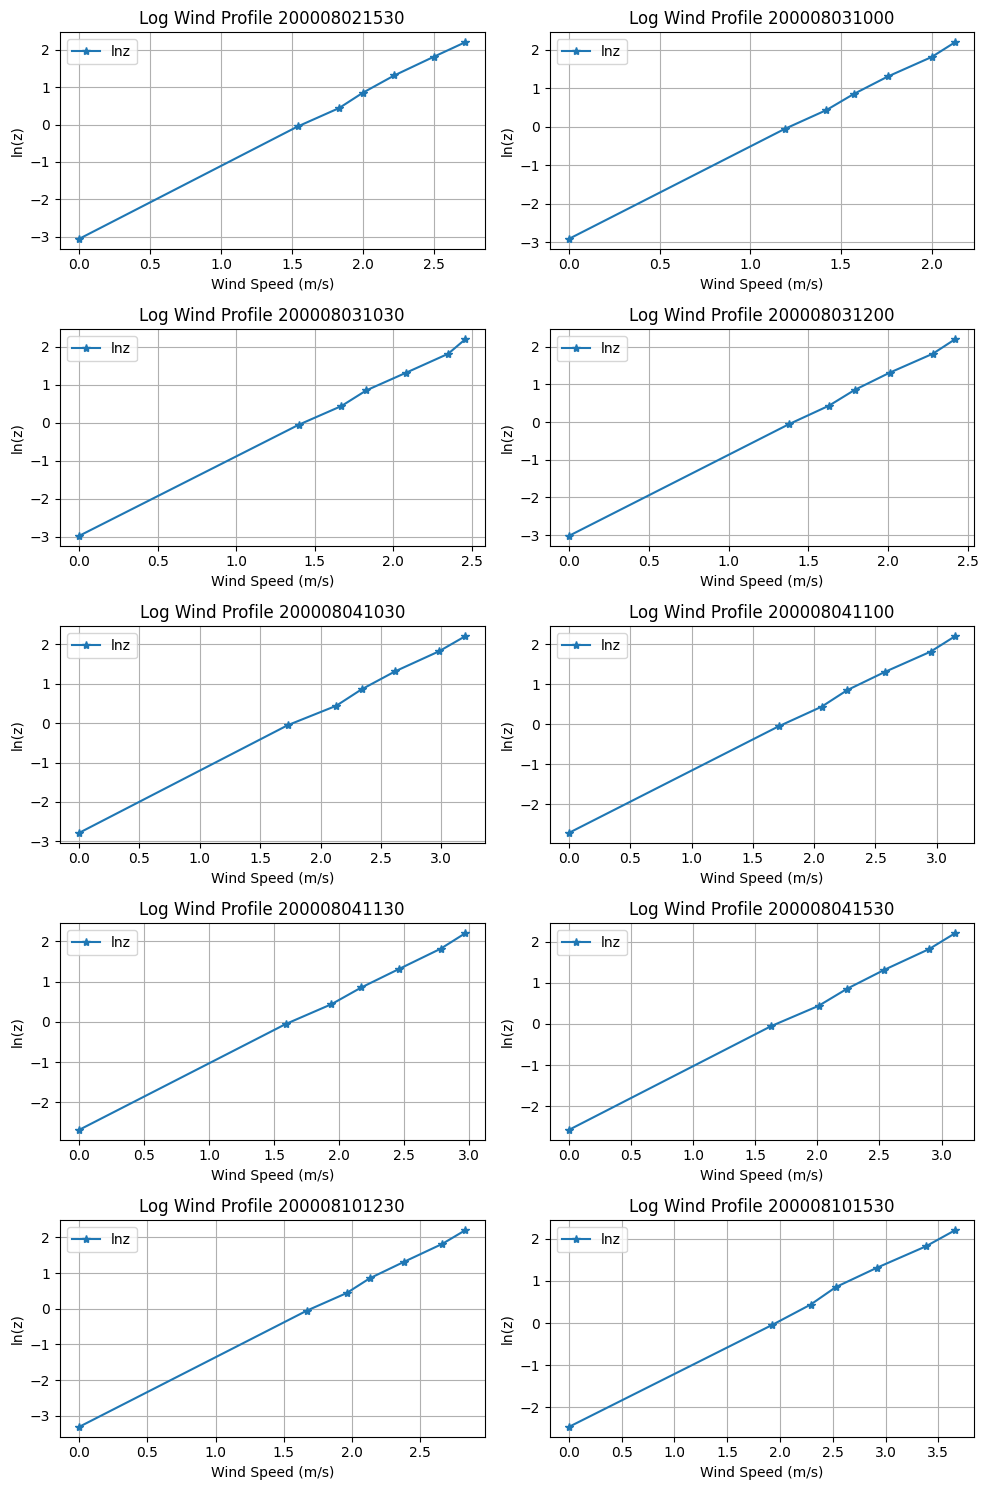

In [30]:

fit,ax=plt.subplots(5,2,figsize=(10,15))
ax = ax.flatten()
coefs = {}
for i,TS in enumerate(TimeStamp_All):
    coefs[TS]={}
    df[TS]['Table_1']['lnz'] = np.log(df[TS]['Table_1']['Height (m)'])
    m,b=np.polyfit(df[TS]['Table_1']['Wind Speed (m/s)'],df[TS]['Table_1']['lnz'],1)
    coefs[TS]['m']=m
    coefs[TS]['b']=b
    new_first_row = pd.DataFrame(data={
                                'lnz':m*0+b,
                                'Height (m)':np.exp(m*0+b),
                                'Wind Speed (m/s)':0
                                },index=[-1])

    # Create a new table called wind profile with the
    Wind_Profile = pd.concat([new_first_row,df[TS]['Table_1']]).reset_index()

    Wind_Profile.plot(x='Wind Speed (m/s)',y='lnz',ax=ax[i],marker='*')
    ax[i].grid()
    ax[i].set_title(f'Log Wind Profile {TS}')
    ax[i].set_ylabel('ln(z)')
    ax[i].set_xlabel('Wind Speed (m/s)')
plt.tight_layout()

## Question 2

Based on the slope of the curve in Question 1, calculate the friction velocity $u_{\ast}$.


In [31]:
k = 0.41

for i,TS in enumerate(TimeStamp_All):
    print(f'\nFor {TS}')
    uStar = k/coefs[TS]['m']
    coefs[TS]['Ustar'] = uStar
    print('Ustar = ',uStar)


For 200008021530
Ustar =  0.21067901094029753

For 200008031000
Ustar =  0.17183561595602093

For 200008031030
Ustar =  0.19748624596611658

For 200008031200
Ustar =  0.19110563488473278

For 200008041030
Ustar =  0.264252514940501

For 200008041100
Ustar =  0.26400966745883137

For 200008041130
Ustar =  0.25166941633728257

For 200008041530
Ustar =  0.26882050001997726

For 200008101230
Ustar =  0.21121938207594856

For 200008101530
Ustar =  0.3208805114874838


##  Question 3

Estimate the surface shear stress $\tau_0$ from the result in Question 2 and with help of Appendix A3 (p. 392 ff.) in T. R. Oke, 'Boundary Layer Climates available on Canvas.


In [32]:
import re


for TS in TimeStamp_All:
    print(f'\nFor {TS}')

    Table_1_header_info = df[TS]['Table_1_header_info']

    # Note this "re.findall" is just a hack for the key to auto-parse the temp/pressure.
    # Students can just manually enter the values
    T_a_C = float(re.findall(r'\d+\.\d+',Table_1_header_info[0][Table_1_header_info[0].str.contains('temperature')].values[0])[0])
    T_a = T_a_C+273.15
    P_a = float(re.findall(r'\d+\.\d+',Table_1_header_info[0][Table_1_header_info[0].str.contains('pressure')].values[0])[0])
    P_a = P_a*1e3 # Convert from kPa to Pa
    print('Ta =',T_a,'\nPa = ',P_a)

    R = 8.31446261815324 #Pa m3 K-1 mol-1
    M = 0.0289652 # kg mol−1
    rho = P_a*M/(R*T_a)
    Tau = rho*coefs[TS]['Ustar']**2
    print('rho = ',rho)
    print('Tau = ',Tau)

    # Append these to the dictionary of calculated values for further use
    coefs[TS]['Tau'] = Tau
    coefs[TS]['rho'] = rho


For 200008021530
Ta = 307.75 
Pa =  101250.0
rho =  1.1461443472013366
Tau =  0.05087235685952539

For 200008031000
Ta = 302.15 
Pa =  101460.0
rho =  1.1698080507795827
Tau =  0.03454148254929473

For 200008031030
Ta = 302.95 
Pa =  101353.0
rho =  1.1654885138521027
Tau =  0.045455004647361505

For 200008031200
Ta = 304.25 
Pa =  101380.0
rho =  1.1608177666970851
Tau =  0.04239464782920176

For 200008041030
Ta = 299.45 
Pa =  101516.0
rho =  1.181007147974202
Tau =  0.0824690106801505

For 200008041100
Ta = 300.75 
Pa =  101226.0
rho =  1.1725430215912636
Tau =  0.08172754369242381

For 200008041130
Ta = 301.54999999999995 
Pa =  101097.0
rho =  1.1679420155530227
Tau =  0.07397452171000518

For 200008041530
Ta = 306.75 
Pa =  101228.0
rho =  1.1496309084570793
Tau =  0.0830774582141451

For 200008101230
Ta = 304.95 
Pa =  101132.0
rho =  1.1553200352144741
Tau =  0.05154301753785218

For 200008101530
Ta = 307.84999999999997 
Pa =  101363.0
rho =  1.1470507792745734
Tau =  0.118105

## Question 4

Estimate the eddy diffusivities for momentum $K_M$ using the wind gradients $\Delta \overline{u}$ in Table 1 between (a) $z=0.95$ and $1.55$ m, (b) $z=1.55$ and $2.35$ m, (c) $z=2.35$ and $3.72$ m, (d) $z=3.72$ and $6.15$ m, and (e) $z=6.15$ and $9.05$ m. How does $K_M$ change with height? Explain why.


In [33]:

for TS in TimeStamp_All:
    print(f'\nFor {TS}')
    Delta = df[TS]['Table_1'][['Height (m)','Wind Speed (m/s)']].diff().dropna()
    for i,row in Delta.iterrows():
        # I'm using the "global" u* here for brevity.  
        # If student recalculates u* for each layer thats fine too
        # Differences should be minor
        K_m = coefs[TS]['Ustar']**2*(row['Height (m)']/row['Wind Speed (m/s)'])
        print(f"Km between {df[TS]['Table_1'].iloc[i-1]['Height (m)']} (m) and {df[TS]['Table_1'].iloc[i]['Height (m)']} (m) = {K_m} m^2 s^-1")


For 200008021530
Km between 0.95 (m) and 1.55 (m) = 0.09183237031196277 m^2 s^-1
Km between 1.55 (m) and 2.35 (m) = 0.2088736265919154 m^2 s^-1
Km between 2.35 (m) and 3.72 (m) = 0.2764015206435059 m^2 s^-1
Km between 3.72 (m) and 6.15 (m) = 0.38520399618357276 m^2 s^-1
Km between 6.15 (m) and 9.05 (m) = 0.5850835108512169 m^2 s^-1

For 200008031000
Km between 0.95 (m) and 1.55 (m) = 0.07702820585474379 m^2 s^-1
Km between 1.55 (m) and 2.35 (m) = 0.1574798875252538 m^2 s^-1
Km between 2.35 (m) and 3.72 (m) = 0.21290866372657694 m^2 s^-1
Km between 3.72 (m) and 6.15 (m) = 0.29896572397372434 m^2 s^-1
Km between 6.15 (m) and 9.05 (m) = 0.65868991416813 m^2 s^-1

For 200008031030
Km between 0.95 (m) and 1.55 (m) = 0.08666848299064332 m^2 s^-1
Km between 1.55 (m) and 2.35 (m) = 0.1950040867289473 m^2 s^-1
Km between 2.35 (m) and 3.72 (m) = 0.21372447905492645 m^2 s^-1
Km between 3.72 (m) and 6.15 (m) = 0.35100735611210543 m^2 s^-1
Km between 6.15 (m) and 9.05 (m) = 1.028203366388997 m^2 s

Diffusivity increases with height because eddy size increases with height, indicating more efficient mixing.

## Question 5

From the values in Table 1, calculate the aerodynamic resistance of the momentum flux $r_{a_M}$ for the layer from the surface to 9.05 m. 


In [34]:

for TS in TimeStamp_All:
    print(f'\nFor {TS}')
    r_am = coefs[TS]['rho']*df[TS]['Table_1']['Wind Speed (m/s)'].max()/coefs[TS]['Tau']
    print('r_am = ',r_am)


For 200008021530
r_am =  61.28107319651163

For 200008031000
r_am =  72.1361957931185

For 200008031030
r_am =  63.07560116469149

For 200008031200
r_am =  66.26258594538817

For 200008041030
r_am =  45.82597562828614

For 200008041100
r_am =  45.19297107365372

For 200008041130
r_am =  46.89165547823094

For 200008041530
r_am =  43.03636873537331

For 200008101230
r_am =  63.433532917545314

For 200008101530
r_am =  35.54630008376237


## Question 6

From the turbulence data provided in Table 2, calculate $\overline{u}$, $\overline{v}$, and $\overline{w}$.  How does the magnitude of $\overline{u}$ compare to $\overline{v}$ and $\overline{w}$?

## Answer

In all cases, $\overline{u}$ will be much higher than $\overline{v}$ and $\overline{w}$, because $\overline{u}$ is alihgned with the mean wind vector.


In [35]:

for TS in TimeStamp_All:
    print(f'\nFor {TS}')
    print(df[TS]['Table_2'].mean())


For 200008021530
u (m/s)    2.819385e+00
v (m/s)   -4.444444e-07
w (m/s)    2.777778e-07
dtype: float64

For 200008031000
u (m/s)    2.260098e+00
v (m/s)    3.888889e-07
w (m/s)   -1.111111e-07
dtype: float64

For 200008031030
u (m/s)    2.318629e+00
v (m/s)   -1.277778e-06
w (m/s)    9.444444e-07
dtype: float64

For 200008031200
u (m/s)    2.402693e+00
v (m/s)    1.666667e-07
w (m/s)   -4.444444e-07
dtype: float64

For 200008041030
u (m/s)    3.013212e+00
v (m/s)    3.333333e-07
w (m/s)    6.666667e-07
dtype: float64

For 200008041100
u (m/s)    2.614670e+00
v (m/s)    1.944444e-06
w (m/s)   -3.333333e-07
dtype: float64

For 200008041130
u (m/s)    2.624076e+00
v (m/s)    3.333333e-07
w (m/s)    2.777778e-07
dtype: float64

For 200008041530
u (m/s)    2.833415e+00
v (m/s)   -4.444444e-07
w (m/s)   -1.111111e-07
dtype: float64

For 200008101230
u (m/s)    2.806915e+00
v (m/s)    1.111111e-07
w (m/s)    1.111111e-07
dtype: float64

For 200008101530
u (m/s)    3.704799e+00
v (m/s)   -7.

$\overline{v} \approx 0$ and $\overline{w}\approx 0$ while $\overline{u} >> 0$ because the coordinate system is rotated to align with the mean wind vector $\overline{u}$

## Question 7

From the data in Table 2 calculate $\overline{u^{\prime 2}}$, $\overline{v^{\prime 2}}$, and $\overline{w^{\prime 2}}$. Name those parameters.


In [36]:

for TS in TimeStamp_All:
    print(f'\nFor {TS}')
    Varinaces = ((df[TS]['Table_2'] - df[TS]['Table_2'].mean())**2).mean()
    print(Varinaces)

    # Append these to the dictionary of calculated values for further use
    coefs[TS]['Varinaces'] = Varinaces


For 200008021530
u (m/s)    0.265467
v (m/s)    0.203510
w (m/s)    0.075126
dtype: float64

For 200008031000
u (m/s)    0.179361
v (m/s)    0.199017
w (m/s)    0.075369
dtype: float64

For 200008031030
u (m/s)    0.240205
v (m/s)    0.226385
w (m/s)    0.067443
dtype: float64

For 200008031200
u (m/s)    0.193740
v (m/s)    0.162799
w (m/s)    0.080949
dtype: float64

For 200008041030
u (m/s)    0.406048
v (m/s)    0.234977
w (m/s)    0.103931
dtype: float64

For 200008041100
u (m/s)    0.297669
v (m/s)    0.305626
w (m/s)    0.095692
dtype: float64

For 200008041130
u (m/s)    0.289997
v (m/s)    0.305791
w (m/s)    0.078840
dtype: float64

For 200008041530
u (m/s)    0.354389
v (m/s)    0.205836
w (m/s)    0.092386
dtype: float64

For 200008101230
u (m/s)    0.500369
v (m/s)    0.659769
w (m/s)    0.127997
dtype: float64

For 200008101530
u (m/s)    0.584567
v (m/s)    0.398512
w (m/s)    0.140782
dtype: float64


These parameters are the variance of the u, v, and w components.

## Question 8

From the data in Table 2 calculate the turbulence intensities $I_u$, $I_v$, and $I_w$.


In [37]:

for TS in TimeStamp_All:
    print(f'\nFor {TS}')
    Intensity = Varinaces**.5/df[TS]['Table_2']['u (m/s)'].mean()

    print(Intensity)
    
    # Append these to the dictionary of calculated values for further use
    coefs[TS]['Intensity'] = Intensity



For 200008021530
u (m/s)    0.271183
v (m/s)    0.223906
w (m/s)    0.133082
dtype: float64

For 200008031000
u (m/s)    0.338291
v (m/s)    0.279314
w (m/s)    0.166015
dtype: float64

For 200008031030
u (m/s)    0.329751
v (m/s)    0.272263
w (m/s)    0.161824
dtype: float64

For 200008031200
u (m/s)    0.318214
v (m/s)    0.262738
w (m/s)    0.156162
dtype: float64

For 200008041030
u (m/s)    0.253739
v (m/s)    0.209503
w (m/s)    0.124521
dtype: float64

For 200008041100
u (m/s)    0.292415
v (m/s)    0.241437
w (m/s)    0.143502
dtype: float64

For 200008041130
u (m/s)    0.291367
v (m/s)    0.240572
w (m/s)    0.142987
dtype: float64

For 200008041530
u (m/s)    0.269840
v (m/s)    0.222798
w (m/s)    0.132423
dtype: float64

For 200008101230
u (m/s)    0.272388
v (m/s)    0.224901
w (m/s)    0.133673
dtype: float64

For 200008101530
u (m/s)    0.206373
v (m/s)    0.170395
w (m/s)    0.101277
dtype: float64


## Question 9

From the data in Table 2 calculate the mean turbulent kinetic energy per unit mass $\overline{e}$. What is the ratio of $\overline{e}$ to the mean kinetic energy per unit mass?


In [38]:

for TS in TimeStamp_All:
    print(f'\nFor {TS}')
    e_bar = coefs[TS]['Varinaces'].sum()*.5
    MKE = (df[TS]['Table_2'].mean()**2).sum()*.5

    print('e_bar',e_bar,'\nMKE',MKE,'\ne_bar/MKE',e_bar/MKE)


For 200008021530
e_bar 0.272051121238713 
MKE 3.974465105950176 
e_bar/MKE 0.06844974455340543

For 200008031000
e_bar 0.2268739744288935 
MKE 2.5540219870461063 
e_bar/MKE 0.08883007882453202

For 200008031030
e_bar 0.26701665516040274 
MKE 2.6880200910090424 
e_bar/MKE 0.0993358107900781

For 200008031200
e_bar 0.21874395933987345 
MKE 2.886468027471237 
e_bar/MKE 0.0757825679196972

For 200008041030
e_bar 0.372477930505179 
MKE 4.539721939267045 
e_bar/MKE 0.08204862224784565

For 200008041100
e_bar 0.34949380948858494 
MKE 3.418249023414193 
e_bar/MKE 0.1022435191510728

For 200008041130
e_bar 0.33731418314422534 
MKE 3.4428861148502192 
e_bar/MKE 0.09797424947903047

For 200008041530
e_bar 0.3263055964540617 
MKE 4.014120281112604 
e_bar/MKE 0.08128944167154321

For 200008101230
e_bar 0.6440673349710847 
MKE 3.939386376431693 
e_bar/MKE 0.16349432968148778

For 200008101530
e_bar 0.5619305123881666 
MKE 6.862769050134055 
e_bar/MKE 0.08188101745565662


Note that $\overline{v} = 0$ and $\overline{w} = 0$. In all cases the ratio TKE/MKE is less than one, which means more
energy is contained in the mean motions compared to the turbulent fluctuations. Typical values are about 10%.

## Question 10


Which of the three wind components, $u$, $v$ or $w$, contains most turbulent kinetic energy per unit mass. Speculate about the shape of the eddies.



Vertical motions have much less energy (lower variance) than horizontal motions in u and v direction. 

For the shape of eddies > none are spherical; some are pancake (flattened but $\approx$ symmetrical in u & v) while some are cigar (elongated in one direction u or v).

In most cases $\overline{u^{\prime 2}} \approx \overline{v^{\prime 2}}$ which means the energy in the eddies has a pancake shape.  In some cases $\overline{u^{\prime 2}} >> \overline{v^{\prime 2}}$ or $\overline{v^{\prime 2}} >> \overline{u^{\prime 2}}$  which indicate a cigar shape distribution.

## Question 11

From the data in Table 2 calculate (a) $\overline{u^{\prime}v^{\prime}}$ and (b) $\overline{u^{\prime}w^{\prime}}$


In [39]:

for TS in TimeStamp_All:
    print(f'\nFor {TS}')
    u_prime = (df[TS]['Table_2']['u (m/s)']-df[TS]['Table_2']['u (m/s)'].mean())
    v_prime = (df[TS]['Table_2']['v (m/s)']-df[TS]['Table_2']['v (m/s)'].mean())
    w_prime = (df[TS]['Table_2']['w (m/s)']-df[TS]['Table_2']['w (m/s)'].mean())

    cov_v=(u_prime*v_prime).mean()
    print(cov_v)
    cov_w=(u_prime*w_prime).mean()
    print(cov_w)
    # Append these to the dictionary of calculated values for further use
    coefs[TS]['cov_v'] = cov_v
    coefs[TS]['cov_w'] = cov_w




For 200008021530
-0.04506567094012346
-0.04752976945686728

For 200008031000
-0.03821201816041975
-0.04260006771130864

For 200008031030
0.01529899764809568
-0.056581757299558645

For 200008031200
-0.006531817643361109
-0.05364919793066667

For 200008041030
0.024728086423925925
-0.08979190804659261

For 200008041100
-0.010397008574567906
-0.06516034293785185

For 200008041130
-0.08010233029738888
-0.04913808956541667

For 200008041530
-0.04440451721555555
-0.05182626188166667

For 200008101230
-0.0321832170627963
-0.06015630608501851

For 200008101530
-0.03947759136666666
-0.10123429976733334


## Question 12

Calculate $r_{uv}$ and $r_{uw}$. Discuss your results.

## Answer

The magnitude determines the the efficiency of the flux density (must be 1 < $ < 1). Values of ruv are typically only weakly correlated and can be positive or negative. There is no physical reason for a correlation between v and u (Info for TA: unless there is wind shear turning Ekman Spiral). All values of $r_{uv}$ are well negatively correlated (average -0.3) because wind increases with height. 


In [40]:

for TS in TimeStamp_All:
    print(f'\nFor {TS}')

    print(coefs[TS]['cov_v']/(df[TS]['Table_2']['u (m/s)'].std()*df[TS]['Table_2']['v (m/s)'].std()))
    print(coefs[TS]['cov_w']/(df[TS]['Table_2']['u (m/s)'].std()*df[TS]['Table_2']['w (m/s)'].std()))


For 200008021530
-0.19377918206000744
-0.33637532685856386

For 200008031000
-0.20213837047861405
-0.36619059264387244

For 200008031030
0.06557025290476533
-0.4442982468159442

For 200008031200
-0.03675842507671951
-0.428161044181182

For 200008041030
0.08001068547892955
-0.436852093476615

For 200008041100
-0.03445124747881778
-0.38586603218957344

For 200008041130
-0.2688404737337179
-0.32479256868235856

For 200008041530
-0.16431788049809246
-0.2862630823528408

For 200008101230
-0.05598183240223126
-0.23757167213354372

For 200008101530
-0.08174693413456245
-0.3526919643678101


## Question 13

Plot a scatter graph of $u^{\prime}$ ($x$-axis) vs. $w^{\prime}$ ($y$-axis). Comment your graph and discuss if it looks like you expected.

## Answer

Although not perfect, there is a visible negative correlation between u' and w', physically meaning that events that transport excess momentum downwards (called "sweeps") and events that transport
deficit of momentum upwards (called "ejections") are more common.


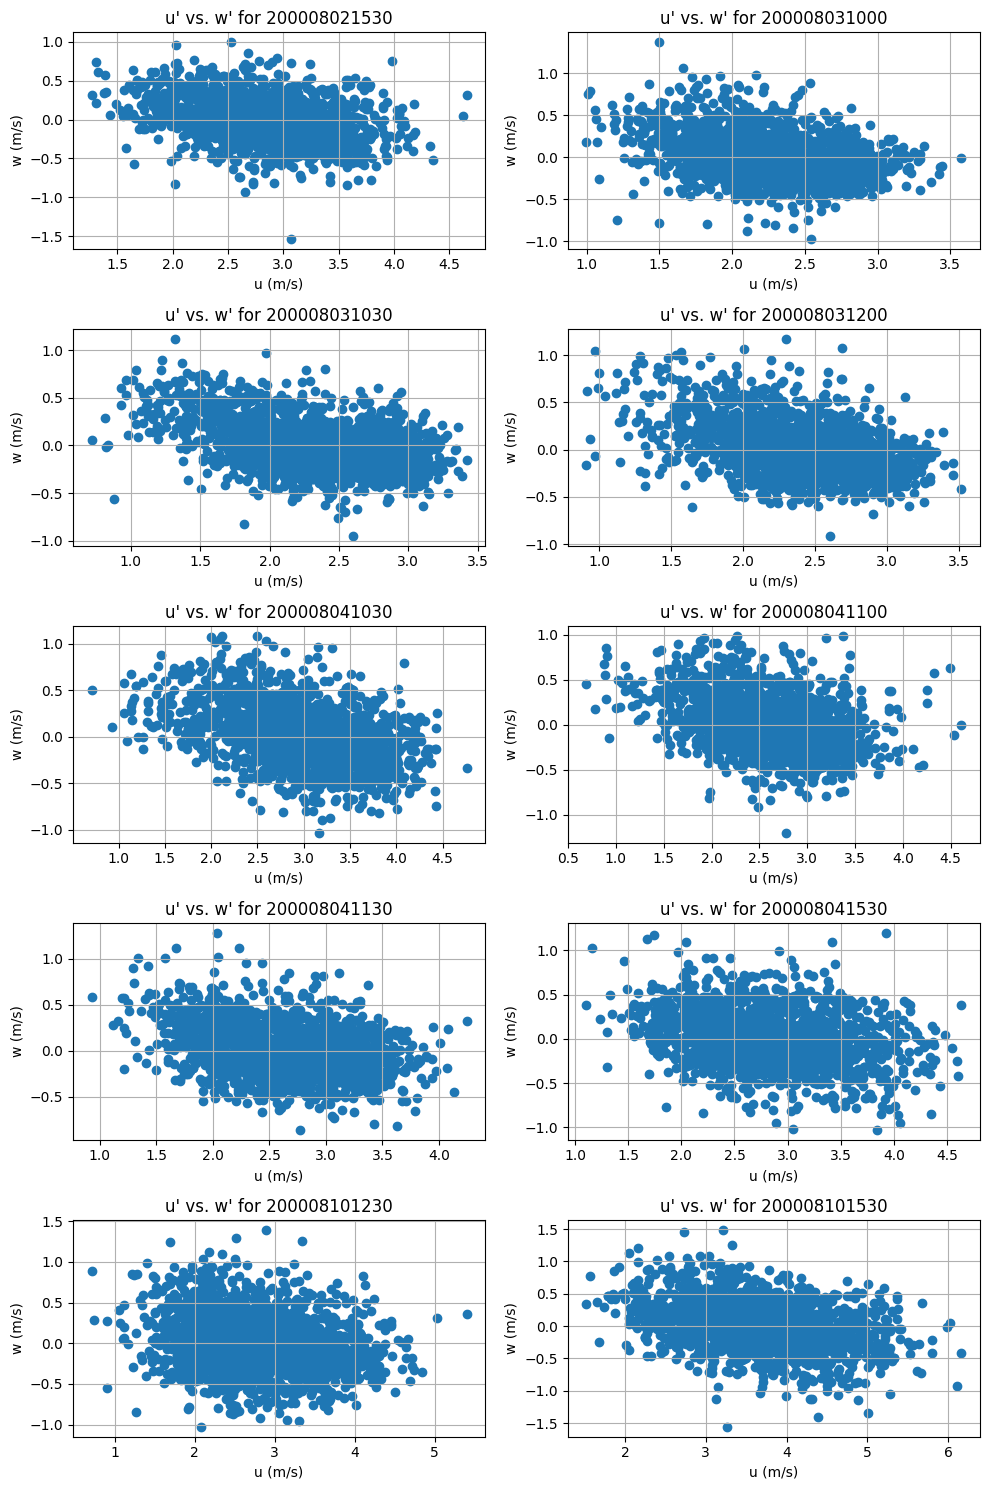

In [41]:
fig,ax=plt.subplots(5,2,figsize=(10,15))
ax=ax.flatten()


for i,TS in enumerate(TimeStamp_All):
    # print(f'\nFor {TS}')
    ax[i].scatter(df[TS]['Table_2']['u (m/s)'],df[TS]['Table_2']['w (m/s)'])
    ax[i].set_xlabel('u (m/s)')
    ax[i].set_ylabel('w (m/s)')
    ax[i].grid()
    ax[i].set_title(f"u' vs. w' for {TS}")
plt.tight_layout()

## Question 14

Using your result in question 11 (b), calculate the friction velocity $u_{\ast}$ based on the high-frequency data and compare it to your answer in question 2.

## Answer

Generally close, but may diverge by up to ~0.03

In [42]:

for TS in TimeStamp_All:
    print(f'\nFor {TS}')
    ustar = (-coefs[TS]['cov_w'])**.5
    coefs[TS]['Ustar_EC'] = ustar
    print('ustar from EC = ',coefs[TS]['Ustar_EC'])
    print('ustar from profile = ',coefs[TS]['Ustar'])


For 200008021530
ustar from EC =  0.21801323229764583
ustar from profile =  0.21067901094029753

For 200008031000
ustar from EC =  0.2063978384366189
ustar from profile =  0.17183561595602093

For 200008031030
ustar from EC =  0.23786920208290657
ustar from profile =  0.19748624596611658

For 200008031200
ustar from EC =  0.2316229650329748
ustar from profile =  0.19110563488473278

For 200008041030
ustar from EC =  0.2996529793721274
ustar from profile =  0.264252514940501

For 200008041100
ustar from EC =  0.25526524036353215
ustar from profile =  0.26400966745883137

For 200008041130
ustar from EC =  0.2216711293006301
ustar from profile =  0.25166941633728257

For 200008041530
ustar from EC =  0.2276538202659175
ustar from profile =  0.26882050001997726

For 200008101230
ustar from EC =  0.2452678252136193
ustar from profile =  0.21121938207594856

For 200008101530
ustar from EC =  0.3181733800419723
ustar from profile =  0.3208805114874838


This value should be close (although not exactly equal) to the result found in the simultaneously measured wind profile. Note, those are two independent methods of estimating \(u_{\ast}\) using completely different systems.